# Sentiment Analysis on Twitter Data

Name: Riley Hager

Student-ID: 455336

# Preparation

## API Usage

APIs, or "application programming interface", are tools and routines used to build software applications. For example, Twitter uses and API to allow different programs and projects to access different aspects of Twitter. With some APIs, one would be able to post to Twitter, or perhaps search for different tweets (which will be used within this homework). 

To import the API package into python, we first have to run a command in command prompt. This looks as follows:

sudo pip install python-twitter

Once the package has been installed, we can begin to work with the Twitter Data!

## Public and Secret Keys

This Twitter API, along with many others, utilize public and secret keys to make sure that only validated individuals can access the API commands and functions. Plugging these into the program can validate the user and allow the API to know who is using which commands. For the most part, these APIs or companies make it pretty simply to receive their own API keys to be used for a number of processes. 

## Creating and Accessing API Keys

To create your own API Keys for Twitter Data, the steps are quite simple! While this does require a Twitter account, there is no extra information or payment necessary to access this data.

First, go to https://developer.twitter.com and sign in to your account. If you do not have a Twitter account (or don't want to link your personal account), you can use a separate email for this.

Next, click on Apps and fill out the forms to the best of your ability (not all information is necessary). This will require a phone number, which Twitter uses as a safety check (they don't hand out API keys to just everyone!)

Once approved, click on Keys and Tokens, and you should find your API Keys and access tokens!

# Problem 1:  Analyzing Twitter Data

We start with importing the package into the notebook or the python program.

In [42]:
import twitter

We then will then import a few other packages that will be needed throughout the homework

In [43]:
import sys
import re, string

Our next step is to plug in your API keys, which can be found from the Twitter developer website. This will give us limited access for searching tweets, mostly limiting us to the past week and occasionally restricting the amount of tweets we can pull at a time.

In [44]:
api = twitter.Api(consumer_key='''OrYugAXMmqMapGRg63wRRMo9P''',
                  consumer_secret='''CO3e7dGhqfThssaVO97zFGhNHpm2QVdM3c4iQPDvJr5M2YmqsJ''',
                  access_token_key='''1095086064182661120-vmMc7ZRzOuea4uWUCIEtyNxEPpovFE''',
                  access_token_secret='''ScrXMX1jLkPj8XR8yRx89K3xEoigFj0tKqPiuS2tNBmdx''',
                  sleep_on_rate_limit=True)

Your next few tasks are to implement a few functions that will pull the information from Twitter. The last task will be conducting a sentiment analysis on the data that has been pulled! As a fair warning, Twitter data can be pretty messy; your results may not be nearly as clean as the movie dataset.

In [63]:
# This function will take in a search term and run through the twitter API to find
# the most recent tweets using that search term!

def searchTerm(searchTerm):
    
    # These two variables are used to keep track of calls made to the API
    untilID = sys.maxsize
    ids = []
    processedResults = []
    
    # Create a while loop that runs as long as the length of processedResults is under 100
    
    # your code here


    while len(processedResults) < 100:
        
        results = getResults(searchTerm, untilID)

        # Call the getResults function, passing in the searchTerm as well as untilID
        # your code here
        
        # Create a loop going through each result in results. 
        for result in results:
            
        # Run preProcess on each result: if the returned value is not None, append the result and result.id
        # to their respective lists
        
        # your code here
            if preProcess(result) != None:
                processedResults.append(preProcess(result))
                ids.append(result.id)
        untilID = min(ids)
         
    return processedResults

In [64]:
# This function will take the search term and return a list of tweet words

def getResults(searchTerm, untilID):
    
    # We will use api.GetSearch() in order to pull the Twitter data
    #
    # There are several parameters that we will need to include:
    #
    #     term: string, the term that is being searched
    #     since: string in format 'YYYY-MM-DD' which will serve as the earliest date
    #     until: string in format 'YYYY-MM-DD' which will serve as the latest data 
    #     count: int, the number of tweets to return, max of 100
    #     result_type: string, type of sorting for tweets. Typically 'recent'
    #     max_id: int, another check to limit the tweets returned. Typically sys.maxint
    #     lang: string, indication of the language being used
    #
    # You are free to change these however you wish, yet we recommend leaving lang as 'en'
    
    # CAUTION: The 'since' variable must be at most a week prior to the current date!
    #          If you would like to search further, you must apply through Twitter
    
    results = api.GetSearch(term=searchTerm, since="2019-02-09", until="2019-02-10", count="100",\
                            result_type="recent", max_id=untilID, lang="en")
        
    return results

In [65]:
# Here we pass in a result, which is a Twitter object from python-twitter, and return the processed result!

def preProcess(result):
    
    # First make sure that the result is not a retweet (result.retweeted_status) 
    # nor a media post (result.media)

    
    # your code here
    if result.retweeted_status == None and result.media == None:
            
        # Remove links (anything before "https://") and remove whitespace
        # your code here
        tweet = result.text
        #line below found on Stack Exchange when I googled "remove links from text python"
        #https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
        tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
       
        # Deal with punctuation within the tweets, removing most (if not all) punctuation
        # and set processedResult to all lowercase as well as split into a list of words        
        
        # your code here

        tweet = tweet.replace(".", "")
        tweet = tweet.replace(",", "")
        tweet = tweet.replace(";", "") 
        tweet = tweet.replace(":", "")
        tweet = tweet.replace(":", "")
        tweet = tweet.lower().translate(str.maketrans("", "", string.punctuation)).split(" ")


    else:
        
        return None
    
    return tweet


In [94]:
# Replace the string within the searchTerm function to search for new Twitter sentiment data!

data = searchTerm('python')
print(data)

[['python', '', 'data', 'analysis', 'is', 'cool', '', 'python', '2', 'remains', 'popular', 'because', 'python', '27', 'is', 'what', 'is', 'available', 'on', '', 'macosx', '', 'httpstcosw7lnum4ba'], ['only', '10', 'months', '22', 'days', 'left', 'until', 'python', '2', 'retires'], ['polysmite', 'monty', 'pythons', 'flying', 'circus', '1969', 'title', 'sequence'], ['hello', 'from', 'python', 'timestamp', '20190209', '235903'], ['learn', 'python', 'basics', 'with', 'this', 'indepth', 'video', 'course', 'httpstcozu0nyhpjsz'], ['i', 'want', 'to', 'learn', 'how', 'to', 'programcode', 'but', 'i', 'feel', 'like', 'im', 'so', 'late', 'to', 'the', 'game', 'at', 'this', 'point', 'anyone', 'have', 'any', 'suggesti…', 'httpstcobjb29jaxsl'], ['i', 'just', 'spent', '30', 'min', 'staring', 'at', 'my', 'python', 'code', 'only', 'to', 'realize', 'line', '17', 'needed', 'an', 'extra', 'parenthesis', '😤😫'], ['now', 'its', 'sunny', 'what', 'the', 'fuck', 'is', 'up', 'with', 'that'], ['heatsquad305', 'see',

**NOTE:** If the Twitter API fails to work, or for some reason users are unable to access the data, one can use data from the zipped sampleTwitterData folder to continue to work on the lab. It is important to note that there are 10 CSV files containting the tweets for 10 keywords and each CSV has over 500 tweets, yet these tweets are **not** processed! You will still need to implement and run an appropriate version of preProcess() on that data. 

Great! We now have all the data stored in our data variable. We can cycle through this data set and perform the same rule-based sentiment analysis that we saw previously in the lab.

In [95]:
# This function runs a rule-based sentiment analysis on a given entry

def analyzeSentiment(entry):
    
    # Set the score to zero, then loop through each word in the entry
    # At each word, add one to the score if it is in positive_words, subtract one if it is in negative_words
    # or do nothing if it is in neither!
    
    # your code here
    sentiment_score = 0
    for word in entry:
        if word in positive_words:
            sentiment_score += 1
        if word in negative_words:
            sentiment_score -= 1
    if sentiment_score >= 0:
        return 'Positive'
    else:
        return 'Negative'


In [96]:
# Don't touch this code! For setup purposes only

sentiments = []

global negative_words
global positive_words

with open('utility/data/negative-words.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('utility/data/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
    
for entry in data:
    
    sentiments.append(analyzeSentiment(entry))

In [97]:
print(sentiments)

['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Po

# Problem 2: Understanding the Results
## Visualizing the Results

The final step is creating a few simple charts to look at the overall sentiment of the current Twitter search.

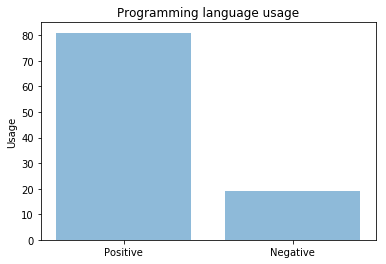

In [98]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
positive = sum([1 for x in sentiments if x == 'Positive'])
negative = sum([1 for x in sentiments if x == 'Negative'])
performance = [positive, negative]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

## Further Visualization

For a slightly more colorful view at the overall data, we can use a wordcloud module!

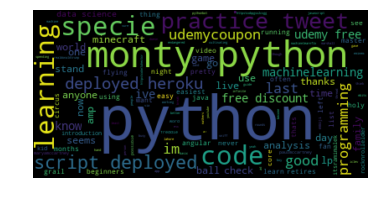

In [99]:
from wordcloud import WordCloud
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

overallWords = ' '

for entry in data:
    for word in entry:
        overallWords += word + ' '

wordcloud = WordCloud().generate(overallWords)

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

After looking at the two graphs, there are many things that can be seen after analyzing Twitter data. Fill in the markdown box below with some of your findings. A few questions have been provided as examples.

- What was the overall sentiment? 
- What were some of the words that were used the most (larger = more common)? 
- Why do you think this is? 
- Do you believe this would be different during different weeks?

**Answer:** 
#It appears that many tweets were analyzed to have a sentiment score of zero - this could be due to the positive and negative word files having a finite set of words.
#When "python" was my search term, "monty python," "learning," and "code" were three words (besides "python") that were the most commonly used in the tweets.
#I think this result is because Monty Python is a popular movie, and learning to code in Python is a common topic, especially now that computer science is becoming even more popular.
#I believe this could potentially be different during different weeks, depending on current political or cultural events.